In [1]:
#Importing required libraries
import pandas as pd
from ExtremeLy import extremely as ely

In [2]:
#Hiding all the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the Danish Univariate dataset.
data = pd.read_csv("/home/msc2/Desktop/Project/Learning Concepts/danishuni.csv",index_col=0)
data.head()

,Date,Loss
1,1980-01-03,1.683748
2,1980-01-04,2.093704
3,1980-01-05,1.732581
4,1980-01-07,1.779754
5,1980-01-07,4.612006


In [5]:
#Basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 1 to 2167
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2167 non-null   object 
 1   Loss    2167 non-null   float64
dtypes: float64(1), object(1)
memory usage: 50.8+ KB


In [6]:
#5 point summary of the data
data.describe()

,Loss
count,2167.000000
mean,3.385088
std,8.507452
min,1.000000
25%,1.321119
50%,1.778154
75%,2.967023
max,263.250366


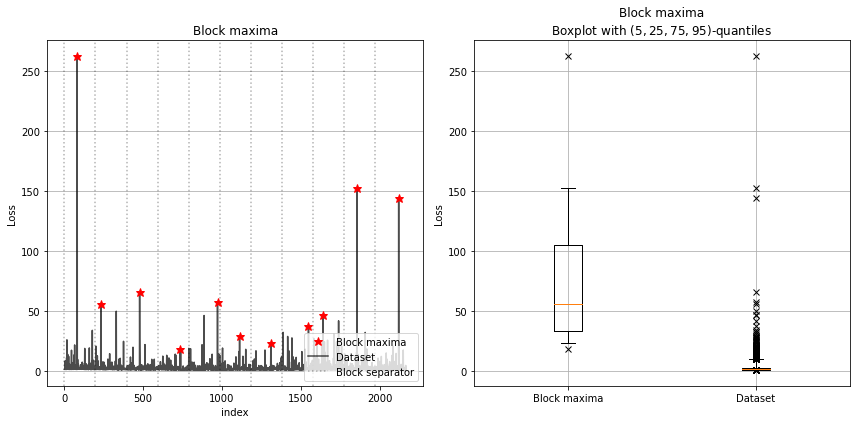

,Date,Loss
0,1980-12-31,263.250366
1,1981-12-31,56.225426
2,1982-12-31,65.707491
3,1983-12-30,13.348165
4,1984-12-31,19.162304
5,1985-12-29,57.410636
6,1986-12-30,29.026037
7,1987-12-31,32.467532
8,1988-12-26,47.019521
9,1989-12-31,152.413209


In [7]:
#Calling the getBM method of ExtremeLy. Note: all th functions of ExtremeLy take input of dataframe having first
#column as Date and second column as the Loss column of our interest.
maxima=ely.getBM(sample=data,period="Y") # Here Y means Yearly, we can pass M for monthly, W for weekly and D for daily.
maxima

In [8]:
#Fitting the GEV distribution with maxima values. Here, default fit_method is MLE and default Confidence interval method is delta.
fit=ely.gevfit(sample=maxima,fit_method="mle",ci=0,ci_method="delta")

In [9]:
#Getting estimated distribution parameters for GEV fit.
params=ely.gevparams(model=fit)
params

OrderedDict([('shape', -0.6384049125307144),
             ('location', 37.79353853187126),
             ('scale', 28.93607752286071)])

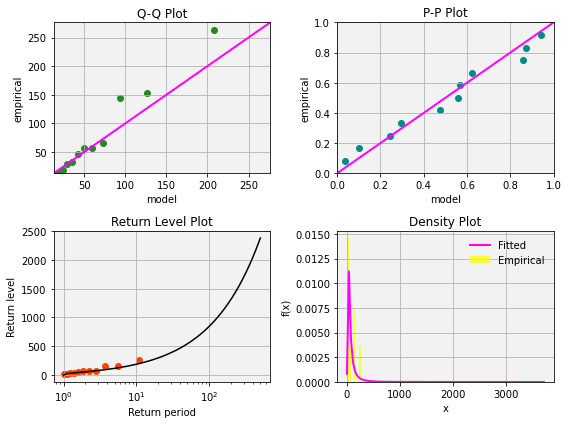

In [10]:
#Summarizing the GEV model with various plots like QQplot, PPplot, Return Level Plot and Data Probability density plot
ely.gevsummary(model=fit)

In [11]:
#Calculating value-at-Risk 
var=ely.gevVaR(sample=maxima)
print("Value-at-Risk at 99% confidence interval is",round(var,2),"million Danish Krones.")

Value-at-Risk at 99% confidence interval is 847.06 million Danish Krones.


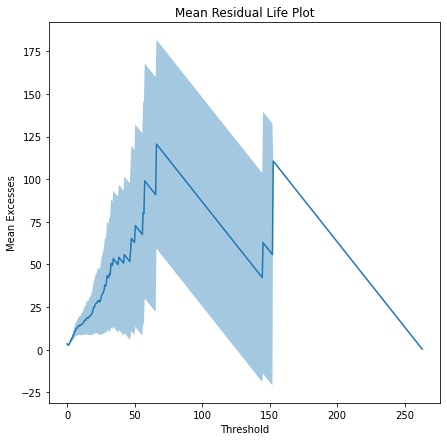

In [12]:
#Mean Residual Life plot for finding appropriate threshold value for Peak-Over-Threshold method.
ely.MRL(sample=data,alpha=0.05)

,Date,Loss
index,,
82,1980-07-15,263.250366
178,1981-02-10,34.141547
232,1981-05-29,56.225426
330,1981-12-21,50.065531
478,1982-10-24,65.707491
887,1985-03-04,46.500000
972,1985-08-23,57.410636
1388,1987-06-05,32.467532
1549,1988-03-25,38.154392


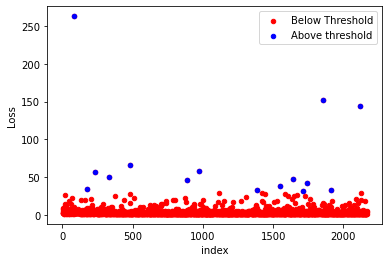

In [13]:
#Getting large claims using POT method using threshold value as 30.
ely.getPOT(sample=data,threshold=30)

In [14]:
#Fitting GPD with large claims obtained using POT method.
gpdfit=ely.gpdfit(sample=data,threshold=30)

In [15]:
#Getting estimated distribution parameters for GPD fit.
ely.gpdparams(fit=gpdfit)

Shape: 0.6586260117024005
Scale: 19.267021192664032


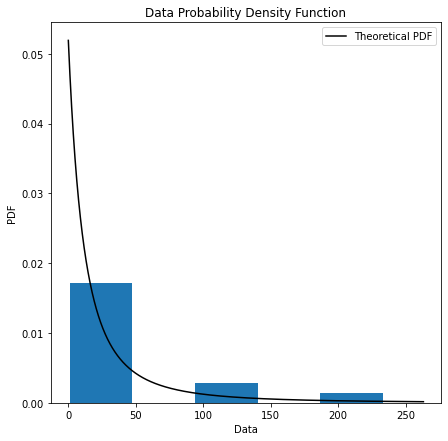

In [16]:
#Data Probability Density Function plot.
ely.gpdpdf(sample=data,threshold=30,bin_method="sturges",alpha=0.05)

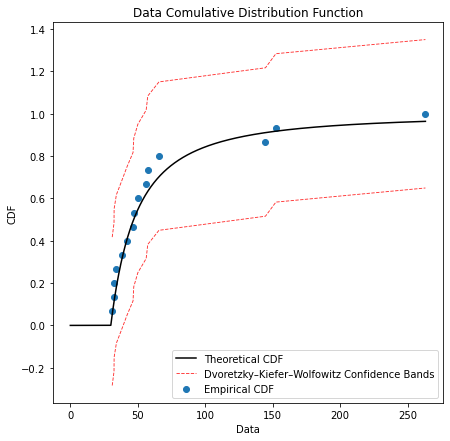

In [17]:
#Cumulative Density Function plot.
ely.gpdcdf(sample=data,threshold=30,alpha=0.05)

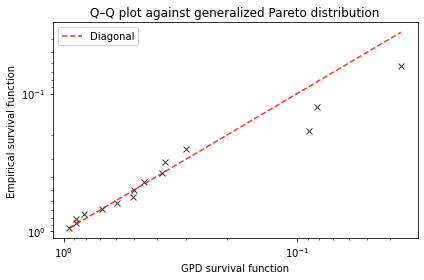

In [18]:
#Quantile-Quantile plot.
ely.gpdqqplot(gpdfit[5])

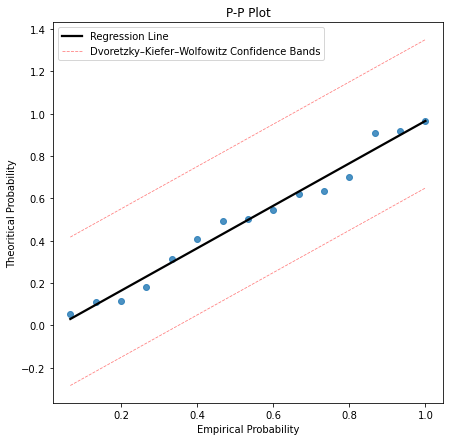

In [19]:
#Probability-Probaility plot.
ely.gpdppplot(sample=data,threshold=30,alpha=0.05)

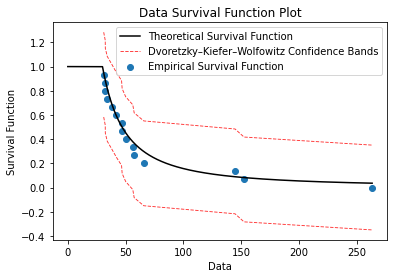

In [20]:
#Survival Function
ely.survival_function(sample=data,threshold=30,alpha=0.05)